In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from scipy.stats import multivariate_normal
import pandas as pd
import sklearn
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelBinarizer

<h2>Heirarchial Clustering</h2>

In [50]:
# ChatGPT generated Class

class HierarchicalClustering:
    
    def linkages(self, X, linkage_type='single'):
        """
        Compute linkage matrix.
        
        Parameters:
        - X: numpy array of data points.
        - linkage_type: string, type of linkage ('single', 'complete', 'average', etc.)
        
        Returns:
        - Z: linkage matrix
        """
        return linkage(X, method=linkage_type)

    def dendrogram(self, Z, labels=None):
        """
        Plot dendrogram based on linkage matrix.
        
        Parameters:
        - Z: linkage matrix.
        - labels: list of labels for the data points.
        """
        plt.figure(figsize=(10, 8))
        dendrogram(Z, labels=labels)
        plt.show()

<br>

In [26]:
# using my dataset
hc_dataframe = pd.read_csv('./problem3-dataset1/new_customers.csv')
hc_dataframe

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
# doing pre processing
# converting genre to binary int
converter = LabelBinarizer().fit(hc_dataframe["Genre"])
bin_arr = converter.transform(hc_dataframe["Genre"])

In [28]:
bin_arr.shape

(200, 1)

In [29]:
bin_arr = bin_arr.flatten()

In [30]:
hc_dataframe["Genre"] = bin_arr

In [31]:
hc_dataframe

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [32]:
# now let's remove Customer ID since it has no role to play in clustering
hc_dataframe = hc_dataframe[["Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [33]:
hc_dataframe

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


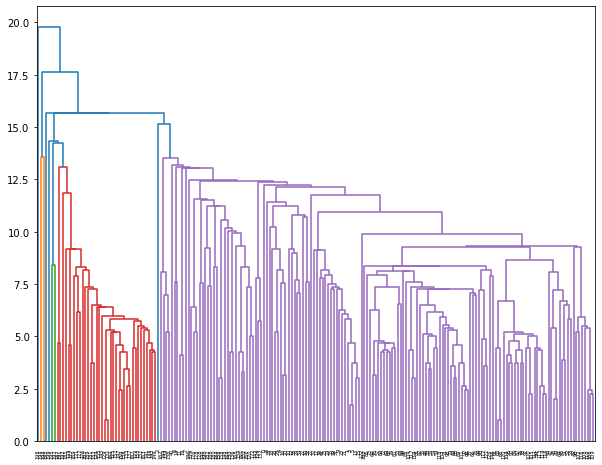

In [34]:
# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

data = np.array(hc_dataframe)

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(data, 'single')
hc.dendrogram(linkage_matrix)

<h2>Experimentation</h2>

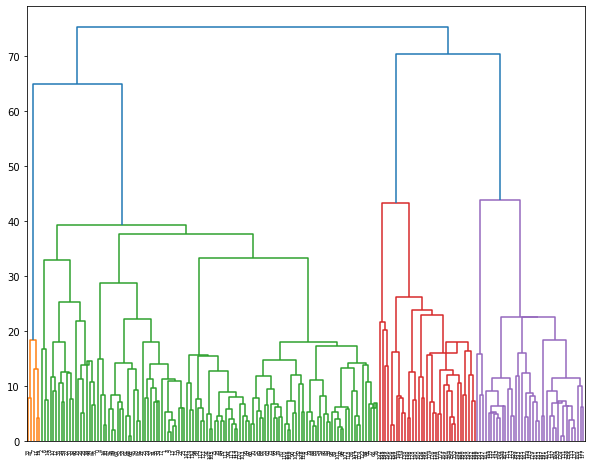

In [35]:
# varying the features

#1
hc_da = hc_dataframe[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

data = np.array(hc_da)

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(data, 'median')
hc.dendrogram(linkage_matrix)

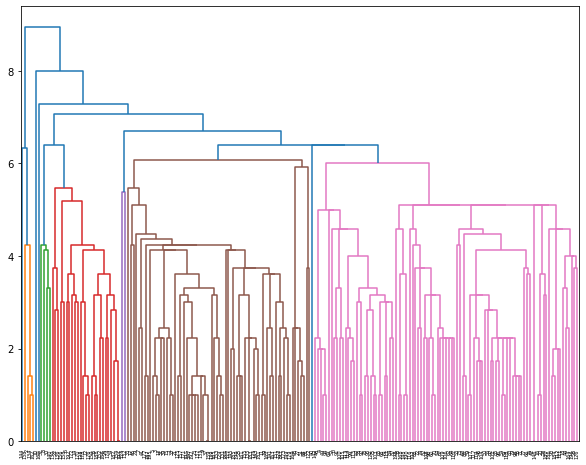

In [36]:

#2
hc_da = hc_dataframe[["Genre","Age","Spending Score (1-100)"]]

# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

data = np.array(hc_da)

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(data, 'single')
hc.dendrogram(linkage_matrix)

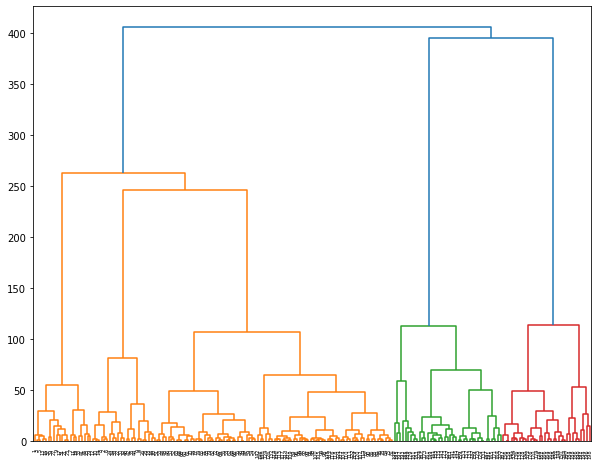

In [37]:

#3
hc_da = hc_dataframe[["Genre","Annual Income (k$)","Spending Score (1-100)"]]

# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

data = np.array(hc_da)

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(data, 'ward')
hc.dendrogram(linkage_matrix)

<h2>Heirarchial Clustering on Gene dataset</h2>

In [38]:
gene_dataframe = pd.read_csv('./problem3-dataset2/gene.csv')

In [39]:
gene_dataframe

,ID_REF,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,10338001,5192.230000,5974.650000,5393.020000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,10338002,301.503000,307.677000,362.596000,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,10338003,1850.110000,2037.540000,1891.180000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,10338004,927.983000,1140.820000,936.433000,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,10338005,5.249740,5.017300,5.095850,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062
5,10338006,9.387960,8.481250,8.842170,6.57887,7.93186,8.89203,9.00878,8.01693,9.97759,9.42498,8.14469,7.04968
6,10338007,21.053700,21.974900,20.089100,18.08180,19.94690,18.88650,18.27040,18.69870,22.72940,20.63030,18.47490,17.29990
7,10338008,48.830500,52.573200,48.165400,52.53910,45.28810,46.77410,47.38890,50.22880,49.29140,51.55040,47.68180,48.11590
8,10338009,677.660000,736.404000,913.221000,833.52800,797.24600,812.74600,793.95200,767.29900,807.24800,859.43700,835.13800,798.52200
9,10338010,5.663750,6.366670,4.817760,4.89682,5.17924,6.31512,4.89282,5.26197,6.01668,6.80280,4.90521,4.45203


In [40]:
np_gene = np.array(gene_dataframe)
np_gene.shape

(58, 13)

In [41]:
# removing gene IDs
np_gene = np_gene[:,1:]

In [42]:
np_gene.shape

(58, 12)

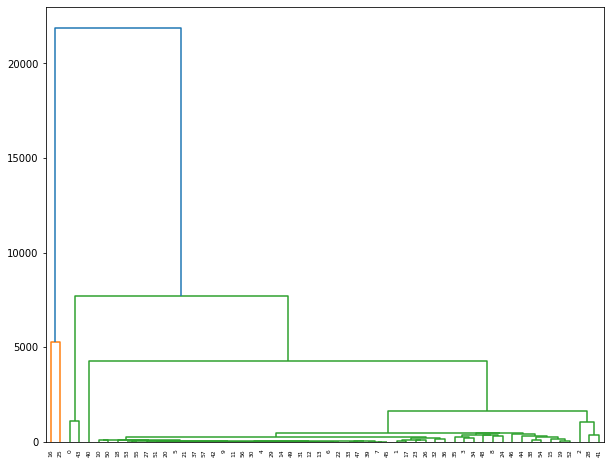

In [43]:
# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(np_gene, 'single')
hc.dendrogram(linkage_matrix)

<h2>Experimentation</h2>

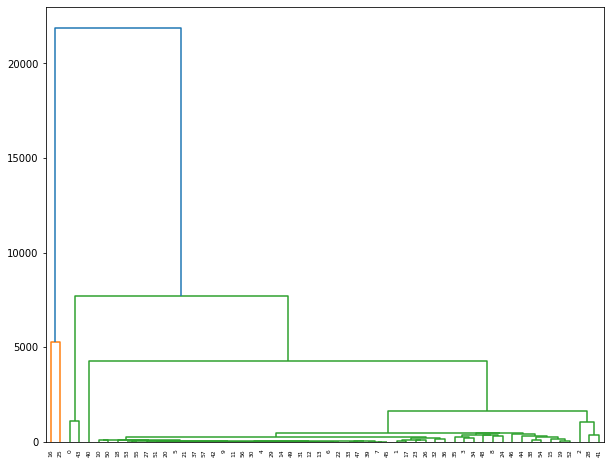

In [47]:
# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(np_gene, 'single')
hc.dendrogram(linkage_matrix)

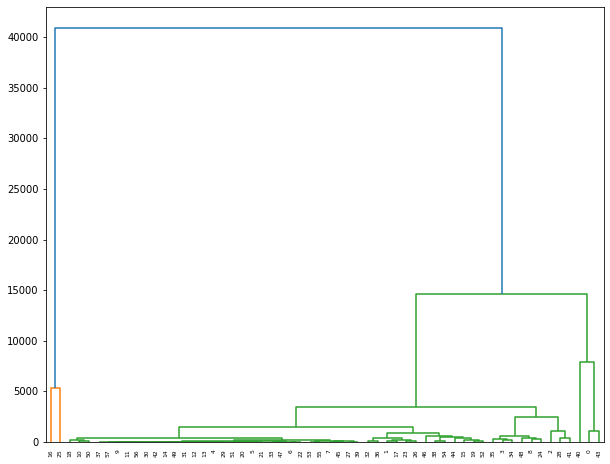

In [48]:
#2

# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(np_gene, 'average')
hc.dendrogram(linkage_matrix)

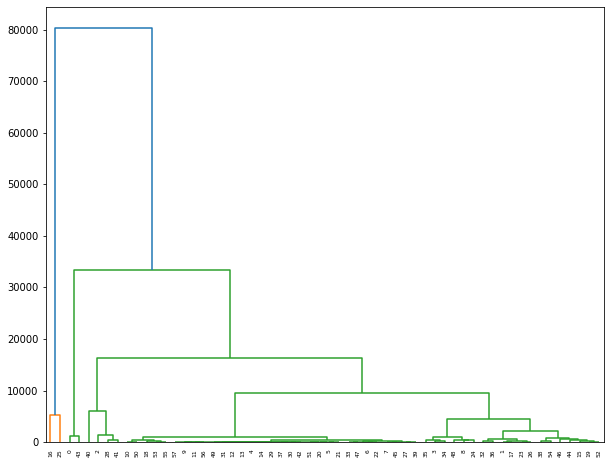

In [49]:
# Create an instance of our class and perform clustering
hc = HierarchicalClustering()

# Compute linkages and plot dendrogram
linkage_matrix = hc.linkages(np_gene, 'ward')
hc.dendrogram(linkage_matrix)

## Observations

1) The choice of linkage method significantly impacts the cluster structures obtained.

2) Single linkage is suitable for identifying elongated or non-globular clusters but may lead to chaining and sensitivity to outliers.

3) Average linkage provides a balanced approach and is versatile for various cluster shapes and sizes.

4) Ward's linkage is ideal when aiming for equally sized, compact clusters with minimal within-cluster variance.

5) The choice of linkage should align with the characteristics of the data and the goals of clustering.